In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Explanation

In [78]:
# Read Data
df = pd.read_csv('tbl_cnn.csv')
df.head()

,_id,author,content,publishedAt,slug,source,tag,title,url,urlToImage
0,610a281ce12961efb18c37ff,CNN Indonesia,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,2021-08-04 12:28,3-beda-blt-subsidi-gaji-2021-vs-2020,CNN Indonesia,"blt, bsu",3 Beda BLT Subsidi Gaji 2021 vs 2020,https://www.cnnindonesia.com/ekonomi/202108041...,https://akcdn.detik.net.id/visual/2020/08/11/i...
1,610a281ce12961efb18c3800,CNN Indonesia,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,2021-08-04 12:22,tinggi-kematian-jateng-dalam-sebulan-sinyal-kr...,CNN Indonesia,pesawat presiden,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...",https://www.cnnindonesia.com/nasional/20210804...,https://akcdn.detik.net.id/visual/2021/08/03/p...
2,610a281ce12961efb18c3801,CNN Indonesia,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...",2021-08-04 09:50,harga-batu-bara-acuan-tembus-us13099-per-ton-a...,CNN Indonesia,"batu bara, harga batu bara acuan","Harga Batu Bara Acuan Tembus US$130,99 per Ton...",https://www.cnnindonesia.com/ekonomi/202108040...,https://akcdn.detik.net.id/visual/2019/11/11/4...
3,610a281ce12961efb18c3802,CNN Indonesia,Capaian jumlah vaksinasi Covid-19 di Indonesia...,2021-08-04 12:06,china-tes-covid-massal-deteksi-kasus-tertinggi...,CNN Indonesia,"vaksin, vaksinasi, covid-19, virus corona, epi...","China Tes Covid Massal, Deteksi Kasus Tertingg...",https://www.cnnindonesia.com/nasional/20210804...,https://akcdn.detik.net.id/visual/2021/08/03/v...
4,610a281ce12961efb18c3803,BNPB,Badan Nasional Penanggulangan Bencana (BNPB) m...,2021-08-04 09:00,bnpb-kirim-masker-dan-tabung-oksigen-ke-papua-...,CNN Indonesia,"bnpb, ingat pesan ibu, papua barat, penanganan...",BNPB Kirim Masker dan Tabung Oksigen ke Papua ...,https://www.cnnindonesia.com/nasional/20210803...,https://akcdn.detik.net.id/visual/2021/07/29/k...


In [3]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16792 entries, 0 to 16791
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          16792 non-null  object
 1   author       15260 non-null  object
 2   content      14019 non-null  object
 3   publishedAt  6883 non-null   object
 4   slug         16792 non-null  object
 5   source       16792 non-null  object
 6   tag          16792 non-null  object
 7   title        16792 non-null  object
 8   url          16792 non-null  object
 9   urlToImage   14009 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB


**Data Explanation** :
 - _id  : kolom id ini berisikan informasi lengkap tentang isi berita itu sendiri
 - author  : kolom ini ber-isikan sumber si pengarang berita
 - content : kolom ini ber-isikan rangkuman isi dari berita 
 - publishedAt   : kolom ini ber-isikan tanggal dari kapan waktu berita itu di publish
 - slug     : kolom ini berisikan bagian dari link" setiap berita
 - source : kolom ini ber-isikan sumber si pem publish berita
 - tag : kolom ini ber-isikan beberapa kata singkat yang merepresentasikan isi berita 
 - title : kolom ini ber-isikan judul berita
 - url :  kolom ini ber-isikan link atau sumber dari setiap berita 
 - urlToImage : kolom ini ber-isikan link atau sumber dari gambar setiap berita 

In [4]:
# check the number of rows and columns
df.shape

(16792, 10)

# Data Cleansing & EDA.

_id               0
author         1532
content        2773
publishedAt    9909
slug              0
source            0
tag               0
title             0
url               0
urlToImage     2783
dtype: int64
_id             0.000000
author          9.123392
content        16.513816
publishedAt    59.010243
slug            0.000000
source          0.000000
tag             0.000000
title           0.000000
url             0.000000
urlToImage     16.573368
dtype: float64


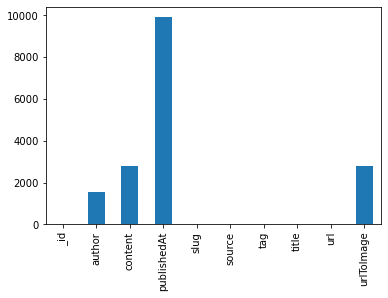

In [5]:
#Check Missing Value and Finding the missing percentage
import matplotlib.pyplot as plt
df.isna().sum().plot(kind="bar");
missing_values_sum = df.isna().sum()
print(missing_values_sum)
missing_values_percent = df.isna().mean()*100
print(missing_values_percent)

## Handling Missing data

**Handling Missing Values**

The researcher may leave the data or do data imputation to replace the them.  Suppose the number of cases of missing values is extremely small; then, an expert researcher may drop or omit those values from the analysis.  In statistical language, if the number of the cases is less than 5% of the sample, then the researcher can drop them.

In the case of multivariate analysis, if there is a larger number of missing values, then it can be better to drop those cases (rather than do imputation) and replace them.  On the other hand, in univariate analysis, imputation can decrease the amount of bias in the data, if the values are missing at random.
https://www.statisticssolutions.com/missing-values-in-data/

 **`Dalam hal ini data yang kami miliki adalah 16.792 dan data yang paling banyak hilang di kolom publishedAt sebanyak 9.909 atau 59% dari total data, Ini tidak terlalu penting, mengingat fokus pembuatan model NLP kepada kolom konten dan title nya, dari hal tersebut bisa kita ketahui bahwa kolom konten memiliki missing data sebanyak 2.773 atau sekitar 16% dalam kasus ini kita tidak dapat melakukan imputation  karna data nya merupakan data content atau bukan data numerik. Selanjutnya kita akan membuang semua baris yang memiliki missing value(NA) pada kolom content`**

In [6]:
# Drop missing value for content columns
df.dropna(subset=['content'],inplace=True)
df.shape

(14019, 10)

In [7]:
# Check Duplication Data for _id columns
df._id.duplicated().sum()

0

Dari sini kita telah berhasil menghapus missing data pada kolom konten dan seperti yang terlihat setelah pengecekan duplikasi data pada kolom id, memang seharusnya kolom itu unique dan tidak memiliki duplikasi data.

# Text Cleansing 

In [8]:
# melakukan regex(regural Expression)
import re
def proc_feature(features):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', features)
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = processed_feature.lower()  
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    processed_feature = regrex_pattern.sub(r'',processed_feature)
    processed_feature = re.sub(r'[^\x00-\x7F]+',' ', processed_feature)
    return(processed_feature)

- \W -> menghapus semua katarakter non-words
- \s+[a-zA-Z]\s+ -> menghapus seluruh karakter huruf tunggal yang sebelum dan sesudah ada whitespace
- ^[a-zA-Z]\s+ -> menghapus yang bukan kata
- \s+ -> menghapus whitespace ganda
- ^b\s+ -> menghapus yang bukan word boundaries
- regrex_pattern -> hapus emoticon
- [^\x00-\x7F]+ -> hapus karakter \x00 - \x7F
- processed_feature.lower() -> case folding atau biasa digunakan untuk merubah semua huruf menjadi huruf kecil

In [9]:
# data cleansing based on Regex
df['content_clean'] = df.content.apply(lambda x : proc_feature(x))
sample_text = df.loc[3]['content_clean']
print(sample_text)

capaian jumlah vaksinasi covid 19 di indonesia masih belum merata beberapa provinsi mulai mendekati 100 persen untuk dosis pertama sementara masih ada provinsi yang belum juga mencapai 10 persen untuk pemberian dosis pertama secara keseluruhan belum ada satupun provinsi yang mencapai 50 persen untuk capaian dosis kedua padahal menurut epidemiolog dari universitas griffith australia dicky budiman vaksinasi covid 19 baru bisa dijadikan syarat berkegiatan di suatu daerah jika 50 persen warga sudah rampung mendapat vaksinasi kedua hal itu dicky sampaikan merespons wacana gubernur dki jakarta anies baswedan yang berniat untuk mulai membuka akses kegiatan baik di sektor sosial budaya ekonomi hingga keagamaan namun dengan syarat baik penyelenggara maupun peserta harus menunjukkan sertifikat vaksin covid 19 lebih lanjut apabila menilik situs resmi kementerian kesehatan vaksinasi covid 19 nasional dengan data grafik perkembangan terakhir per 29 juli 2021 maka dapat dilihat capaian dosis sudah m

In [10]:
# Tokenizing Stopword & Stemming
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = ['dengan', 'ia', 'bahwa', 'oleh', 'di','kok', 'nya','enggak','pakai','apa','jadi','tersebut','kata','video','orang','tak',
                  'sekarang','padahal','mau','terus','kalau','banyak','masuk','lebih','menjadi','hingga','kemudian','mengatakan','memiliki',
                 'membuat','baik','dilakukan','hari','anak','terjadi','cara','merupakan','lalu','selama','perlu','menggunakan','memberikan','makan','beberapa','semua','tubuh','baru','membantu','termasuk','tahun']
my_stp = stop_factory + more_stopwords
dictionary = ArrayDictionary(my_stp)
stopword = StopWordRemover(dictionary)

disini saya menggunakan library sastrawi yang dimana library ini memang di khususkan untuk pengolahan text bahasa, library ini sudah include di dalamnya stopword dan stemming namun dalam kasus ini kita hanya menggunakan stopwordnya saja untuk mengurangi jumlah kata umum (common words) yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna, dan di tambahkan beberapa kata lainnya yang tidak memiliki makna.

In [11]:
#Stopword
df['content_clean'] = df.content_clean.apply(lambda x : stopword.remove(x))
sample_text = df.loc[3]['content_clean']
print(sample_text)

capaian jumlah vaksinasi covid 19 indonesia merata provinsi mulai mendekati 100 persen dosis pertama provinsi belum mencapai 10 persen pemberian dosis pertama keseluruhan belum ada satupun provinsi mencapai 50 persen capaian dosis kedua menurut epidemiolog universitas griffith australia dicky budiman vaksinasi covid 19 bisa dijadikan syarat berkegiatan suatu daerah 50 persen warga rampung mendapat vaksinasi kedua dicky sampaikan merespons wacana gubernur dki jakarta anies baswedan berniat mulai membuka akses kegiatan sektor sosial budaya ekonomi keagamaan syarat penyelenggara maupun peserta menunjukkan sertifikat vaksin covid 19 lanjut apabila menilik situs resmi kementerian kesehatan vaksinasi covid 19 nasional data grafik perkembangan terakhir per 29 juli 2021 dapat dilihat capaian dosis melampaui 50 persen terjadi pemberian dosis pertama itupun tercatat tiga provinsi dki jakarta 90 07 persen bali 89 76 persen kepulauan riau sudah mencapai 64 6 persen sebaliknya tiga provinsi capaian

## Labeling Sentiment Score Based on riochr17 sentiment dictionary.

In [13]:
#Load data list kata bersentimen negatif
neg_file=pd.read_csv('https://github.com/riochr17/Analisis-Sentimen-ID/raw/master/data/negatif.txt',header=None,delimiter='\t').values
neg_file=list(neg_file.reshape(neg_file.shape[0],))

#Load data list kata bersentimen positif
pst_file=pd.read_csv('https://github.com/riochr17/Analisis-Sentimen-ID/raw/master/data/positif.txt',header=None,delimiter='\t').values
pst_file=list(pst_file.reshape(pst_file.shape[0],))

#Pada bagian ini, dihitung jumlah kata negatif dan positif masing-masing kalimat berdasarkan list kata pada neg_file dan pst_file

post_words_count=df.content_clean.apply(lambda x: len([w for w in x.split(' ') if w in pst_file]))
neg_words_count=df.content_clean.apply(lambda x: len([w for w in x.split(' ') if w in neg_file]))

#Menghitung skor sentimen, selisih jml kata positif dan negatif
df['diff_postneg']=(post_words_count-neg_words_count)
#Memberi sign utk selisih <0 -1, >0 1, dan =0 0
df['sentscore_calculated']=df['diff_postneg'].apply(lambda x: 1 if x>0 else -1 if x<0 else 0)

In [14]:
df.head()

,_id,author,content,publishedAt,slug,source,tag,title,url,urlToImage,content_clean,diff_postneg,sentscore_calculated
0,610a281ce12961efb18c37ff,CNN Indonesia,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,2021-08-04 12:28,3-beda-blt-subsidi-gaji-2021-vs-2020,CNN Indonesia,"blt, bsu",3 Beda BLT Subsidi Gaji 2021 vs 2020,https://www.cnnindonesia.com/ekonomi/202108041...,https://akcdn.detik.net.id/visual/2020/08/11/i...,menteri ketenagakerjaan menaker ida fauziyah m...,8,1
1,610a281ce12961efb18c3800,CNN Indonesia,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,2021-08-04 12:22,tinggi-kematian-jateng-dalam-sebulan-sinyal-kr...,CNN Indonesia,pesawat presiden,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...",https://www.cnnindonesia.com/nasional/20210804...,https://akcdn.detik.net.id/visual/2021/08/03/p...,anggota komisi ii dpr fraksi golkar zulfikar a...,-3,-1
2,610a281ce12961efb18c3801,CNN Indonesia,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...",2021-08-04 09:50,harga-batu-bara-acuan-tembus-us13099-per-ton-a...,CNN Indonesia,"batu bara, harga batu bara acuan","Harga Batu Bara Acuan Tembus US$130,99 per Ton...",https://www.cnnindonesia.com/ekonomi/202108040...,https://akcdn.detik.net.id/visual/2019/11/11/4...,harga batu bara acuan hba menguat 13 55 persen...,3,1
3,610a281ce12961efb18c3802,CNN Indonesia,Capaian jumlah vaksinasi Covid-19 di Indonesia...,2021-08-04 12:06,china-tes-covid-massal-deteksi-kasus-tertinggi...,CNN Indonesia,"vaksin, vaksinasi, covid-19, virus corona, epi...","China Tes Covid Massal, Deteksi Kasus Tertingg...",https://www.cnnindonesia.com/nasional/20210804...,https://akcdn.detik.net.id/visual/2021/08/03/v...,capaian jumlah vaksinasi covid 19 indonesia me...,8,1
4,610a281ce12961efb18c3803,BNPB,Badan Nasional Penanggulangan Bencana (BNPB) m...,2021-08-04 09:00,bnpb-kirim-masker-dan-tabung-oksigen-ke-papua-...,CNN Indonesia,"bnpb, ingat pesan ibu, papua barat, penanganan...",BNPB Kirim Masker dan Tabung Oksigen ke Papua ...,https://www.cnnindonesia.com/nasional/20210803...,https://akcdn.detik.net.id/visual/2021/07/29/k...,badan nasional penanggulangan bencana bnpb mel...,2,1


In [15]:
df['sentscore_calculated'].value_counts()

 1    7457
-1    6036
 0     526
Name: sentscore_calculated, dtype: int64

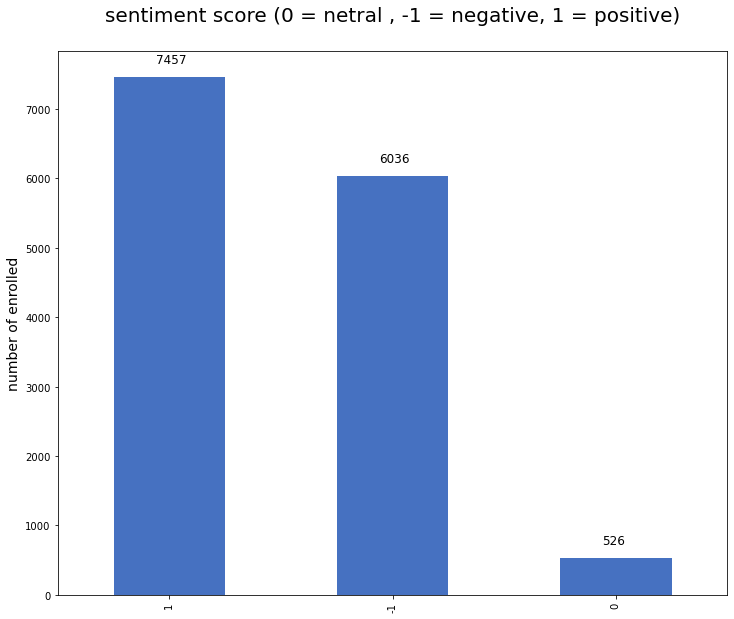

In [16]:
# sentscore_calculated distribution
ax = df['sentscore_calculated'].value_counts().plot(kind='bar', figsize=(12,10), fontsize =10, color='#4671C1')
ax.set_title('sentiment score (0 = netral , -1 = negative, 1 = positive)', size=20, pad=30)
ax.set_ylabel('number of enrolled', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 200, str(round(i.get_height(), 2)), fontsize=12)

Dari hasil melabelkan sentimen score berdasarkan kolom konten yang dimana dilabelkannya itu menggunakan kamus sentimen dari repositori github riochr17, maka perhitungannya adalah setiap baris yang memiliki kata-kata yang mengandung nilai positive dan negative di hitung frekuensi kemunculannya lalu yang tertinggi dari score sentimen tersebut yang akan mewakili nilai score nya, dapat terlihat content dnegan score positive lebih banyak dibandingkan dengan score negative dan netral.

In [17]:
df.head(3)

,_id,author,content,publishedAt,slug,source,tag,title,url,urlToImage,content_clean,diff_postneg,sentscore_calculated
0,610a281ce12961efb18c37ff,CNN Indonesia,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,2021-08-04 12:28,3-beda-blt-subsidi-gaji-2021-vs-2020,CNN Indonesia,"blt, bsu",3 Beda BLT Subsidi Gaji 2021 vs 2020,https://www.cnnindonesia.com/ekonomi/202108041...,https://akcdn.detik.net.id/visual/2020/08/11/i...,menteri ketenagakerjaan menaker ida fauziyah m...,8,1
1,610a281ce12961efb18c3800,CNN Indonesia,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,2021-08-04 12:22,tinggi-kematian-jateng-dalam-sebulan-sinyal-kr...,CNN Indonesia,pesawat presiden,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...",https://www.cnnindonesia.com/nasional/20210804...,https://akcdn.detik.net.id/visual/2021/08/03/p...,anggota komisi ii dpr fraksi golkar zulfikar a...,-3,-1
2,610a281ce12961efb18c3801,CNN Indonesia,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...",2021-08-04 09:50,harga-batu-bara-acuan-tembus-us13099-per-ton-a...,CNN Indonesia,"batu bara, harga batu bara acuan","Harga Batu Bara Acuan Tembus US$130,99 per Ton...",https://www.cnnindonesia.com/ekonomi/202108040...,https://akcdn.detik.net.id/visual/2019/11/11/4...,harga batu bara acuan hba menguat 13 55 persen...,3,1


In [18]:
# Top 10 based number of authors
df['author'].value_counts().head(10)

CNN Indonesia    10460
tim                437
ptr                223
Tim                162
jun                144
has                125
ayp                106
fea                 74
BNPB                70
eks                 62
Name: author, dtype: int64

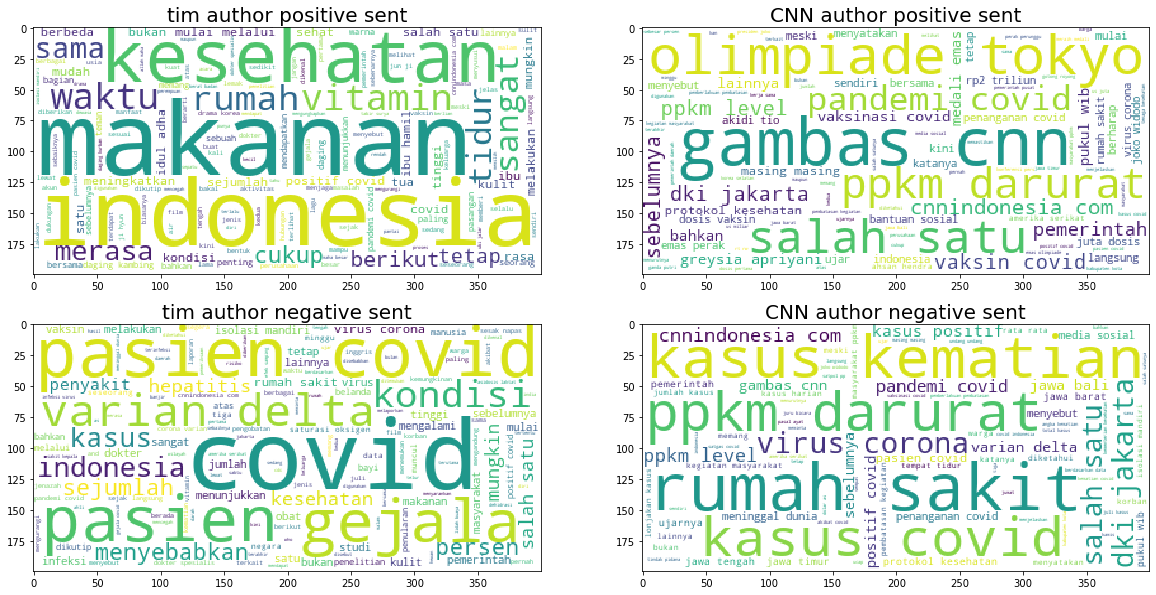

In [43]:
from wordcloud import WordCloud, STOPWORDS
# BA

#stopwords = set(STOPWORDS)
cc_ovo_neg = df[(df['author'] == 'CNN Indonesia') & (df['sentscore_calculated'] == -1)]['content_clean']
ovo_neg = WordCloud(
    background_color='white',
    max_words=150,
    stopwords=my_stp,
    random_state = 99
)
ovo_neg.generate(' '.join(cc_ovo_neg))

# DE
stopwords = set(STOPWORDS)
cc_dana_neg = df[(df['author'] == 'tim') & (df['sentscore_calculated'] == -1)]['content_clean']
dana_neg = WordCloud(
    background_color='white',
    max_words=150,
    stopwords=my_stp,
    random_state = 99
)
dana_neg.generate(' '.join(cc_dana_neg))

# BA
stopwords = set(STOPWORDS)
cc_ovo_post = df[(df['author'] == 'CNN Indonesia') & (df['sentscore_calculated'] == 1)]['content_clean']
ovo_post = WordCloud(
    background_color='white',
    max_words=150,
    stopwords=my_stp,
    random_state = 99
)
ovo_post.generate(' '.join(cc_ovo_post))

# DE
stopwords = set(STOPWORDS)
cc_dana_post = df[(df['author'] == 'tim') & (df['sentscore_calculated'] == 1)]['content_clean']
dana_post = WordCloud(
    background_color='white',
    max_words=150,
    stopwords=my_stp,
    random_state = 99
)
dana_post.generate(' '.join(cc_dana_post))

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 4)
plt.imshow(ovo_neg, interpolation='nearest', aspect='auto')
plt.title('CNN author negative sent', fontsize=20)

plt.subplot(2, 2,3 )
plt.imshow(dana_neg, interpolation='nearest', aspect='auto')
plt.title('tim author negative sent', fontsize=20)

plt.subplot(2, 2,2)
plt.imshow(ovo_post, interpolation='nearest', aspect='auto')
plt.title('CNN author positive sent', fontsize=20)

plt.subplot(2, 2, 1)
plt.imshow(dana_post, interpolation='nearest', aspect='auto')
plt.title('tim author positive sent', fontsize=20)

plt.show()

# Modeling (LSTM)
- disini saya menggunakan model lstm karna model ini adalah model yang bersifat sequence, dalam kasus ini model ini sangat memperhatikan setiap kata dan urutannya dalam setiap dokumen, hal ini akan menjadi sangat baik teruntuk data text dalam jumlah besar yang seperti ini.

In [20]:
y = df.sentscore_calculated
y = y.map({-1:0,0:1,1:2})
X = df.content_clean

In [21]:
#For modeling #tambah validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [22]:
# siapkan target
from tensorflow.keras.utils import to_categorical

def prepare_targets(y_train, y_test):
	y_train_enc = to_categorical(y_train)
	y_test_enc = to_categorical(y_test)
	return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train, y_test)

In [23]:
# split train-val
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X_train.to_numpy(),
                                                                            y_train,
                                                                            test_size=0.1,
                                                                            random_state=42)

In [24]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization\
# Hitung rata-rata token yang dibentuk dalam satu content
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

246

In [25]:
# 10 data teratas train sentence
train_sentences[:10], train_labels[:10]

(array(['gubernur dki jakarta anies baswedan menerbitkan keputusan gubernur nomor 925 2021 pemberlakuan pembatasan kegiatan masyarakat ppkm level 4 covid 19 berlaku mulai 21 25 juli 2021 menetapkan pemberlakuan pembatasan kegiatan masyarakat level 4 covid lima terhitung sejak tanggal 21 juli 2021 25 juli 2021 kutipan kepgub ditandatangani anies rabu 21 7 keputusan anies menekankan penerapan protokol kesehatan optimal penegakan sanksi sesuai ketentuan peraturan gubernur nomor 3 2021 pelaksanaan peraturan peraturan daerah nomor 2 2020 penanggulangan covid 19 pelaksanaan ppkm level 4 dki jakarta sesuai kebijakan pemerintah pusat ppkm level 4 merupakan istilah digunakan pemerintah usai memakai ppkm darurat berlaku tanggal 3 20 juli menteri koordinator bidang kemaritiman investasi luhut binsar pandjaitan menyebut perubahan nama lebih sederhana mengatakan kebijakan merupakan perintah langsung presiden joko widodo presiden perintahkan tidak pakai nama ppkm darurat ataupun mikro gunakan sederh

In [26]:
# Setup text vectorization with custom variables
max_vocab_length = 10000
max_length = 246 # rata-rata token per content

# setup text vectorization dengan parameter default
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # berapa banyak vocab yang ingin dibentuk
                                    standardize="lower_and_strip_punctuation", # cara memproses teks
                                    split="whitespace", # delimiter pemisah token
                                    ngrams=None, # membuat berapa grup kata token (bisa 2 pasang / bigram, 3 pasang / trigram, dst.)
                                    output_mode="int", # token di map ke tipe data apa (integer seperti yang dicontohkan di lecture)
                                    output_sequence_length=max_length) # berapa panjang output token yg diinginkan

In [27]:
# fit data train ke text_vectorizer
text_vectorizer.adapt(train_sentences)

In [28]:
# Buat contoh content untuk membuktikan tokenizer bekerja
sample_sentence ="capaian jumlah vaksinasi covid 19 di indonesia masih belum merata beberapa provinsi mulai mendekati 100 persen untuk dosis pertama sementara masih ada provinsi yang belum juga mencapai 10 persen untuk pemberian dosis pertama secara keseluruhan belum ada satupun provinsi yang mencapai 50 persen untuk capaian dosis kedua padahal menurut epidemiolog dari universitas griffith australia dicky budiman vaksinasi covid 19 baru bisa dijadikan syarat berkegiatan di suatu daerah jika 50 persen warga sudah rampung mendapat vaksinasi kedua hal itu dicky sampaikan merespons wacana gubernur dki jakarta anies baswedan yang berniat untuk mulai membuka akses kegiatan baik di sektor sosial budaya ekonomi hingga keagamaan namun dengan syarat baik penyelenggara maupun peserta harus menunjukkan sertifikat vaksin covid 19 lebih lanjut apabila menilik situs resmi kementerian kesehatan vaksinasi covid 19 nasional dengan data grafik perkembangan terakhir per 29 juli 2021 maka dapat dilihat capaian dosis sudah melampaui 50 persen hanya terjadi pada pemberian dosis pertama itupun hanya tercatat di tiga provinsi yaitu dki jakarta 90 07 persen bali 89 76 persen dan kepulauan riau yang sudah mencapai 64 6 persen sebaliknya tiga provinsi dengan capaian dosis pertama terbawah adalah lampung dengan 9 28 persen maluku utara 12 07 persen dan sumatera barat 13 99 persen sementara untuk pemberian dosis kedua capaian tertinggi masih di 31 45 persen yakni dki jakarta kemudian posisi kedua teratas adalah bali dengan 24 22 persen dan di yogyakarta 14 94 persen sedangkan tiga provinsi terendah untuk dosis kedua adalah sumatera barat dengan 5 12 persen ntb dengan 5 45 persen dan lampung dengan 5 62 persen secara kumulatif kemenkes per selasa 3 8 pukul 18 00 wib mencatat sebanyak 48 148 817 orang telah menerima suntikan dosis vaksin virus corona sementara baru 21 496 995 orang telah rampung menerima dua dosis suntikan vaksin covid 19 di indonesia itu artinya target vaksinasi pemerintah dari total sasaran 208 265 720 orang baru menyentuh 23 12 persen dari sasaran vaksinasi yang menerima suntikan dosis pertama sedangkan suntikan dosis kedua baru berada di angka 10 32 persen "
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 246), dtype=int64, numpy=
array([[1403,   59,   36,    3,    2,   22,    5,  123,  146, 3449,  163,
         129,   73, 3045,  342,    7,   70,  106,   45,  785,  123,   30,
         129,   13,  146,   33,   66,   94,    7,   70,  718,  106,   45,
         606, 1322,  146,   30, 6168,  129,   13,   66,  366,    7,   70,
        1403,  106,   61, 6109,  916, 2863,  132,  796, 4414,  849, 1518,
        3557,   36,    3,    2,  355,   27, 1999,  458, 7906,   22, 1224,
          41,  792,  366,    7,   42,   51, 2353,  194,   36,   61,  299,
          10, 1518, 1839, 1259, 3617,  368,  141,   34,  756, 2009,   13,
        4084,   70,   73,  651,  669,  136,  370,   22,  267,   77, 1747,
         203, 1018, 4453,  728,  130,  458,  370, 2083,  272,  602,  172,
         235, 1416,   17,    3,    2,  112,  254,  585,    1,  586,  246,
         119,   20,   36,    3,    2,  230,  130,   49, 6419, 1088,  128,
          53,  398,   32,   12, 1820,  131, 1573, 1403,  106,   

In [29]:
# Ambil data random dari training set
import random 
random_sentence = random.choice(train_sentences)
print(f"Teks Asli:\n{random_sentence}\
      \n\nVersi Vektorisasi:")
text_vectorizer([random_sentence])

Teks Asli:
manchester united membatalkan uji coba pramusim melawan preston north end stadion deepdale sabtu 31 7 sejumlah kasus positif covid 19 tim dikutip reuters pihak man utd menyatakan dugaan sejumlah kasus positif covid muncul tes rutin dilakukan usai uji coba melawan brentford stadion old trafford rabu 28 7 usai laga berakhir imbang 2 2 dihadiri 30 ribu penonton pihak man utd menyatakan sejumlah pemain ofisial klub diduga positif covid 19 menjalani tes menjaga protokol kesehatan prioritas menyusul tes rutin tim utama telah mengidentifikasi sejumlah kasus dicurigai positif orang dicurigai sudah mengisolasi diri menunggu tes lanjut pernyataan resmi pihak man utd pencegahan berdasarkan protokol kesehatan covid mengambil keputusan sulit memainkan pertandingan persahabatan melawan preston north end sabtu sambung pernyataan resmi man utd disebutkan nama pemain diduga positif covid daily mail mengklaim total sembilan pemain ofisial klub positif usai uji coba melawan brentford gambas tw

<tf.Tensor: shape=(1, 246), dtype=int64, numpy=
array([[1660, 1592, 2141,  913, 1048, 3758,  486,    1, 3954, 2982, 1299,
           1,  354,  469,    6,   50,    4,  105,    3,    2,  154,  169,
        1081,   71,  930, 2190,  159,  508,   50,    4,  105,    3,  607,
         284, 1690,  101,  210,  913, 1048,  486,    1, 1299, 5489, 6877,
          91,  306,    6,  210,  519,  962, 3666,   19,   19, 3397,  180,
          88, 1398,   71,  930, 2190,  159,   50,  192, 4441,  528,  527,
         105,    3,    2,  256,  284,  517,  274,   20, 1360, 1718,  284,
        1690,  154,  310,   97, 6122,   50,    4, 9233,  105,  145, 9233,
          51,    1,  282,  845,  284,  254,  427,  246,   71,  930, 2190,
        1060,  143,  274,   20,    3,  682,  425,  645, 3355,  357, 4037,
         486,    1, 3954, 2982,  354, 3165,  427,  246,  930, 2190, 1726,
         367,  192,  527,  105,    3, 3204, 3100,  793,  126, 1331,  192,
        4441,  528,  105,  210,  913, 1048,  486,    1,   43,  3

In [30]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding 

In [32]:
# Coba memasukan data ke layer embedding
random_sentence = random.choice(train_sentences)
print(f"Teks Asli:\n{random_sentence}\
      \n\nVersi Embedded:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Teks Asli:
timnas spanyol datang membawa misi menyamai sukses meraih medali emas olimpiade 1992 berikut daftar pemain skuad timnas spanyol olimpiade tokyo 2020 pelatih timnas spanyol luis de la fuente memanggil pemain memperkuat klub top eropa sebut dani ceballos dani olmo pedri marco asensio unai simon oscar mingueza kehadiran pemain diharapkan membawa spanyol meraih hasil maksimal olimpiade 2020 la furia roja lama mengukir prestasi ajang sekelas olimpiade spanyol terakhir kali meraih medali merebut medali perak olimpiade sydney 2000 spanyol takluk kamerun partai puncak itu spanyol mampu berjaya bermain rumah sendiri olimpiade 1992 olimpiade berlangsung barcelona spanyol menang 3 2 atas polandia meraih medali emas olimpiade 2020 de la fuente memadukan pemain jebolan piala eropa 21 2019 pemain baru tampil euro 2020 kombinasi akan ancaman buat tim tim lawan spanyol grup berisikan mesir argentina australia skuad dibawa de la fuente lima pemain tulang punggung spanyol melangkah semifinal 

<tf.Tensor: shape=(1, 246, 128), dtype=float32, numpy=
array([[[ 0.04142797,  0.02556068,  0.01708958, ...,  0.02123887,
          0.04659332, -0.03205612],
        [ 0.04151673, -0.03231238,  0.00569637, ...,  0.00088502,
          0.04593218, -0.00440031],
        [-0.01481435, -0.00898363,  0.03811843, ...,  0.03855279,
         -0.00366292, -0.03086681],
        ...,
        [ 0.00887879,  0.02080102,  0.02067016, ...,  0.0097563 ,
         -0.04477048,  0.01948781],
        [-0.00210168, -0.02402627,  0.04036862, ...,  0.00466518,
          0.01292423, -0.0032715 ],
        [ 0.03922231, -0.03687287, -0.03534149, ...,  0.03275137,
         -0.01137082,  0.03545222]]], dtype=float32)>

In [33]:
# Buat Model LSTM
import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout
keras.backend.clear_session()
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64, dropout=0.75, recurrent_dropout=0.75)(x)
x = layers.Dense(76)(x)
x = layers.Dropout(0.75)(x)
x = layers.Dense(88)(x)
x = layers.Dropout(0.75)(x)
print(x.shape)
outputs = layers.Dense(3, activation="softmax")(x)
model_LSTM = tf.keras.Model(inputs, outputs, name="model_calcbase_LSTM")

(None, 246, 128)
(None, 88)


In [34]:
model_LSTM.summary()

Model: "model_calcbase_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 246)               0         
_________________________________________________________________
embedding (Embedding)        (None, 246, 128)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 76)                4940      
_________________________________________________________________
dropout (Dropout)            (None, 76)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 88)        

disini saya menggunakan arsitektur inputlayer 1 token per kata dari setiap dokumen, dengan 3 hidden layer yang berjumlah neuron berkelipatan 12 dari 64 neuron di hidden layer pertama lalu di setiap hidden layernya tersebut diberikan dropout sejumlah 75% untuk menghindari overfitting pada data, lalu terakhir menggunakan 3 output layers karna y nya bernilai 3 kategori diskrit dengan activation softmax -1 sampai 1 .

In [35]:
# Compile model
model_LSTM.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [36]:
# Fit model
model_LSTM_history = model_LSTM.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels))

Epoch 1/10
316/316 [==============================] - 77s 237ms/step - loss: 0.8727 - accuracy: 0.5024 - val_loss: 0.7829 - val_accuracy: 0.5775
Epoch 2/10
316/316 [==============================] - 80s 253ms/step - loss: 0.7427 - accuracy: 0.6623 - val_loss: 0.5200 - val_accuracy: 0.8333
Epoch 3/10
316/316 [==============================] - 87s 277ms/step - loss: 0.5983 - accuracy: 0.7995 - val_loss: 0.5220 - val_accuracy: 0.8378
Epoch 4/10
316/316 [==============================] - 86s 271ms/step - loss: 0.5552 - accuracy: 0.8037 - val_loss: 0.6471 - val_accuracy: 0.6595
Epoch 5/10
316/316 [==============================] - 80s 254ms/step - loss: 0.5547 - accuracy: 0.7876 - val_loss: 0.5434 - val_accuracy: 0.8298
Epoch 6/10
316/316 [==============================] - 77s 245ms/step - loss: 0.5435 - accuracy: 0.7997 - val_loss: 0.4606 - val_accuracy: 0.8574
Epoch 7/10
316/316 [==============================] - 77s 245ms/step - loss: 0.4702 - accuracy: 0.8492 - val_loss: 0.5466 - val_ac

In [37]:
# Buat prediksi
model_LSTM_pred_probs = model_LSTM.predict(val_sentences)
model_LSTM_pred_probs[:10] # prediksi dari 10 data teratas

array([[2.4756099e-04, 6.8548157e-05, 9.9968386e-01],
       [2.0602660e-03, 4.6229191e-04, 9.9747747e-01],
       [9.7755352e-03, 5.4181707e-03, 9.8480636e-01],
       [9.6518118e-03, 5.3571779e-03, 9.8499101e-01],
       [9.9559081e-01, 2.1009818e-03, 2.3082804e-03],
       [9.9552637e-01, 2.1307408e-03, 2.3428674e-03],
       [2.7873734e-02, 1.7720787e-02, 9.5440555e-01],
       [9.9590683e-01, 1.9544510e-03, 2.1386368e-03],
       [9.9833518e-01, 7.6492946e-04, 8.9995947e-04],
       [2.3911010e-02, 7.3299827e-03, 9.6875900e-01]], dtype=float32)

In [38]:
model_LSTM_pred_probs[:10].argmax(axis=1)

array([2, 2, 2, 2, 0, 0, 2, 0, 0, 2], dtype=int64)

## Model Evaluation

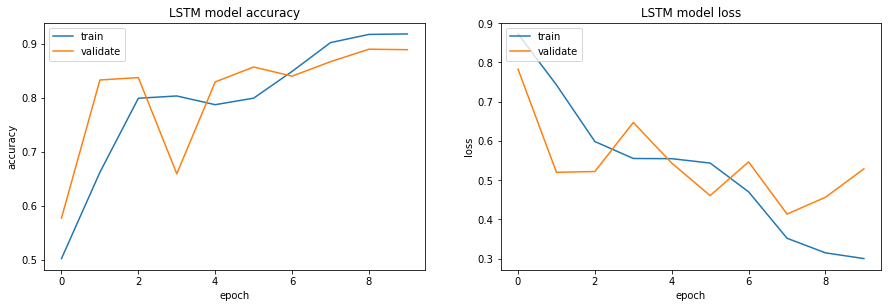

In [44]:
# Plot accuracy training dan validation set
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(model_LSTM_history.history['accuracy'])
plt.plot(model_LSTM_history.history['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


plt.subplot(2, 2,2 )
plt.plot(model_LSTM_history.history['loss'])
plt.plot(model_LSTM_history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

plt.show()

dari hasil train menggunakan 10 epoch hasil accurracy cukup fit dan lossnya cukup baik karna dari garis train n validate tidak jauh signifikan karna dari sisi score nya hanya selisih 0.2

In [40]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [47]:
y_pred = model_LSTM.predict(X_test)
model_LSTM_results = calculate_results(y_true=y_test.argmax(axis=1), 
                                    y_pred=y_pred.argmax(axis=1))
model_LSTM_results

{'accuracy': 88.26676176890157,
 'precision': 0.8861427193554315,
 'recall': 0.8826676176890157,
 'f1': 0.8746131493618268}

hasil akurasi model lstm ini cukup baik untuk kasus pengolahan kata, didapatkan akurasi sejumlah 88.2%

# Model Inference LSTM

**inference score :**
- 0 = Negatif
- 1 = Netral
- 2 = Positive

In [77]:
# inference data baru

review_baru = [
            "menteri pupr basuki hadimuljono mengajak investor asal turki untuk berinvestasi di sektor-sektor infrastruktur indonesia menurut dia ada banyak potensi investasi antara indonesia dengan turki baik melalui skema kerja sama pemerintah dan badan usaha kpbu maupun engineering procurement construction imbuhnya dalam kunjungan kerja di ankara turki dalam keterangan tertulis minggu",
            "pt kereta api indonesia atau kai membagikan 11 ribu tiket kereta api jarak jauh secara cuma cuma alias gratis bagi guru, tenaga kesehatan nakes dan veteran secara gratis namun sejumlah profesi dikecualikan untuk mendapat promo ini antara lain dokter",
            "menteri energi sumber daya alam malaysia shamsul anuar nasarah mengundurkan diri jabatannya bentuk kesetiaan partainya umno menolak keputusan pemerintah pusat terkait status darurat covid 19 mempertimbangkan pendirian keputusan partai anggota umno patuh setia partai mengundurkan diri kabinet menteri pemerintahan federal pernyataan shamsul dikutip malay mail selasa 3 8 pernyataan berlanjut berterima kasih semua pihak staf kementerian energi sda fokus setelah adalah tugas sebagai anggota parlemen lenggong membantu memperkuat partai tengah tantangan situasi politik pengunduran diri shamsul merupakan tantangan terbaru pemerintahan perdana menteri muhyiddin yassin terus diguncang protes waktu belakangan guncangan terakhir terjadi muhyiddin memutuskan memperpanjang status darurat covid 19 restu raja malaysia raja malaysia sendiri meminta pemerintah merundingkan nasib status darurat nasional seharusnya selesai 1 agustus dengan pihak parlemen pemerintah malaysia menyatakan perlu merundingkan penetapan status darurat dengan parlemen muhyiddin secara sepihak mendeklarasikan penghentian status darurat juga membatalkan pertemuan parlemen seharusnya digelar membicarakan penanganan covid 19 sejumlah pihak menganggap muhyiddin membatalkan pertemuan untuk menghindari pemakzulan dirinya gambas cnn pihak oposisi pemerintah memang merencanakan pengajuan mosi percaya rapat dengan pembatalan mereka dapat mengajukan mosi pemimpin oposisi malaysia anwar ibrahim bersama mantan perdana menteri mahathir mohamad sempat menggelar aksi dataran merdeka mereka dilarang gedung parlemen mereka tetap muhyiddin mundur dianggap gagal menangani pandemi covid 19 sejak lockdown diterapkan 1 juni kasus covid 19 malaysia memang terus melonjak",
            "harga jual emas pt antam persero tbk berada posisi rp943 ribu per gram rabu 4 8 harganya turun rp5 000 dibandingkan sebelumnya rp948 ribu per gram harga pembelian buyback turun rp6 000 rp842 ribu per gram rp836 ribu per gram berdasarkan data antam harga jual emas berukuran 0 5 gram senilai rp521 ribu 2 gram rp1 82 juta 3 gram rp2 71 juta 5 gram rp4 49 juta 10 gram rp8 92 juta 25 gram rp22 18 juta 50 gram rp44 29 juta harga emas berukuran 100 gram senilai rp88 51 juta 250 gram rp221 01 juta 500 gram rp441 82 juta 1 kilogram rp883 6 juta harga jual emas sudah pajak penghasilan pph 22 atas emas batangan sebesar 0 45 persen pemegang nomor pokok wajib pajak npwp pembeli tidak menyertakan npwp dikenakan potongan pajak tinggi sebesar 0 9 persen harga emas perdagangan internasional berdasarkan acuan pasar commodity exchange comex melemah 0 01 persen us 1 813 9 per troy ons sebaliknya harga emas perdagangan spot menguat 0 12 persen us 1 812 53 per troy ons pagi pengamat komoditas ariston tjendra harga emas internasional berpotensi bertahan atas us 1 800 per troy ons ini kekhawatiran pasar lonjakan kasus covid 19 obat kuat harga emas ini pasar sedang menunggu data tenaga kerja as segera dirilis data pertimbangan bank sentral as the federal reserves the fed menentukan kebijakan moneternya malam ini data tenaga kerja non farm payrolls versi pihak swasta dirilis pukul 19 15 wib hasil bagus ekspektasi pasar mendorong penguatan dolar as menekan harga emas ucap ariston cnnindonesia com jika hasil data tenaga kerja dirilis pihak swasta lebih buruk ekspektasi dolar as melemah harga emas akan menguat ini harga emas spot berpotensi bergerak kisaran us 1 790 us 1 820 per troy ons pungkas ariston gambas cnn",
            "gubernur dki jakarta anies baswedan menerbitkan instruksi nomor 49 2021 penyelesaian isu prioritas daerah 2021 2022 ingub anies menargetkan ajang balap mobil listrik formula digelar juni 2022 ingub diteken anies 4 agustus ditujukan sekretaris daerah marullah matali 28 isu prioritas diinstruksikan anies diselesaikan salah satunya terkait formula terselenggaranya lomba formula target waktu juni 2022 dikutip lampiran ingub senin 9 8 ingub anies menginstruksikan sekda dki memimpin mengendalikan penyelesaian isu prioritas daerah 2021 2022 memberdayakan seluruh asisten beserta perangkat daerah provinsi dki jakarta bumd potensi daerah lainnya melaporkan ketercapaian penyelesaian isu prioritas daerah 2021 2022 sebagaimana dimaksud diktum kesatu gubernur 2 minggu dikutip ingub diketahui balapan formula ditunda pandemi virus corona mereda jakarta semula formula jakarta berlangsung 6 juni 2020 kemudian diputuskan ditunda 2021 akhirnya ditunda seiring penundaan pemprov dki menyetop penganggaran pembayaran kewajiban tahap 2 2020 informasi soal penyetopan tertuang dokumen jawaban gubernur atas pemandangan umum fraksi fraksi dprd dki raperda pertanggung jawaban pelaksanaan apbd 2020 perubahan rencana pembangunan jangka menengah daerah 2020 dibacakan wakil gubernur ahmad riza patria rapat paripurna senin 2 8 sehubungan ditundanya penyelenggaraan musim 6 formula pandemi covid 19 beberapa kota penyelenggara jakarta telah penghentian segera atas penganggaran dan pembayaran kewajiban tahap 2 2020 riza ",
            
]

hasil = model_LSTM.predict(review_baru)
hasil.argmax(axis=1)

array([2, 0, 0, 1, 2], dtype=int64)

hasil dari model inference menggunakan LSTM model, pada content 1 yang dimana kalimat berita tersebut diperoleh dari situs cnn pada tanggal 7 bulan 11 2021 yang artinya merupakan data baru, dan model ini dapat menebak sentiment tersebut secara baik dengan score 2 atau positive namun untuk content 2 yang dimana data baru juga model ini akan menjadi bias karna sifat kalimatnya yang menurut model ini ambigu.